# Simple Linear Regression

In [2]:
# Import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Exercises

In [3]:
# Useful functions

def calc_ols_coef(x, y):
    """
    Calculate the estimator, a, of alpha from
    ordinary least squares regression.

    Parameters
    ----------
    x : Pandas Series
        The x-values.

    y : Pandas Series
        The y-values.

    Returns
    -------
    a : numeric
        The OLS estimator of alpha.
    
    b : numeric
        The OLS estimator of beta.
    """

    # Calculate means.

    x_bar = x.mean()
    y_bar = y.mean()

    # Calculate the estimator, b, of beta.

    b = np.multiply(x-x_bar, y-y_bar).sum()/np.multiply(x-x_bar, x-x_bar).sum()

    # Calculate the estimator, a, of alpha.

    a = y_bar - (b * x_bar)

    return (a,b)

### Exercise 1

A study conducted at the Virgina Polytechnic Institute and State University to determine if certain static arm-strength measures have an influence on the "dynamic lift" charactersits of an individual. Twenty-five individuals were subjected to strength tests and then were asked to perform a weight-lifting test in which weight was dynamically lifted overhead.

The data are given in **ex1.csv**

(a) Estimate $\alpha$ and $\beta$ for the linear regression curve $\mu_{Y_i} = \alpha + \beta x$

(b) Find a point estimate of $\mu_{Y_i}$

### Exercise 1 Solution

In [4]:
# Import the data
df_1 = pd.read_csv("ex1.csv")
df_1

,individual,arm_strength,dynamic_lift
0,1,17.3,71.7
1,2,19.3,48.3
2,3,19.5,88.3
3,4,19.7,75.0
4,5,22.9,91.7
5,6,23.1,100.0
6,7,26.4,73.3
7,8,26.8,65.0
8,9,27.6,75.0
9,10,28.1,88.3


In [5]:
# Calculate the estimates.

a, b = calc_ols_coef(x=df_1["arm_strength"], y=df_1["dynamic_lift"])

# Calculate the point estimate.

y_hat = a + (b * 30)

# Print the results

print("a =\t", a)
print("b =\t", b)
print("y_hat =\t", y_hat)

a =	 64.52915555832492
b =	 0.5608977925284157
y_hat =	 81.35608933417738


### Exercise 5

The amounts of a chemical compound $y$, which dissolved in 100 grams of water at various temperatures, $x$, were recorded.

The data are in **ex5.csv**

(a) Find the equation of the regression line.

(b) Graph the line on a scatter diagram.

(c) Estimate the amount of chemical that will dissolve in $100$ grams of water at $50^{\circ}C$.

### Exercise 5 Solution

In [6]:
# Read the data
df_5 = pd.read_csv("ex5.csv")
df_5

,x,y
0,0,8
1,0,6
2,0,8
3,15,12
4,15,10
5,15,14
6,30,25
7,30,21
8,30,24
9,45,31


In [7]:
# Calculate the estimates.

a, b = calc_ols_coef(x=df_5["x"], y=df_5["y"])

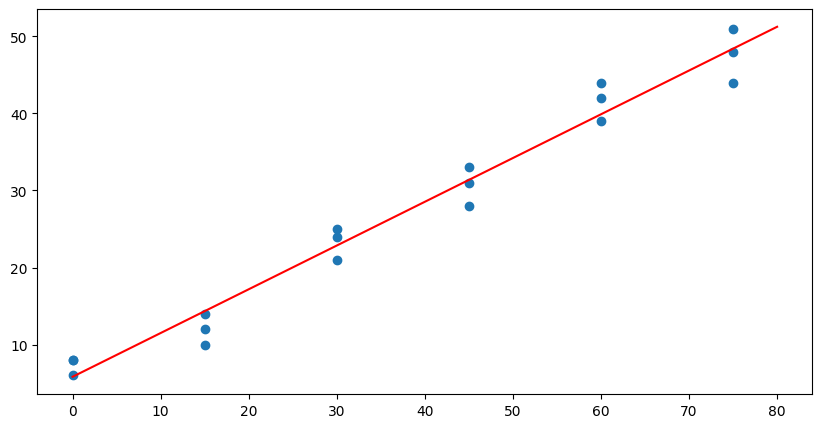

In [8]:
# Plot the scatter diagram with regression line.

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(x=df_5["x"], y=df_5["y"])

x_tmp = np.linspace(start=0, stop=80, num=180)

y_hats = [a + (b * x) for x in x_tmp]

ax.plot(x_tmp, y_hats, color="red")


In [9]:
# Calculate the point estimate and print result.

y_hat = a + (b * 50)

print(f"y_hat =\t{y_hat:.2f}")

y_hat =	34.21


### Exercise 7

A study was made by a retail merchant to determine the relation between weekly advertising expenditures and sales.

The data are in **ex7.csv**

(a) Plot a scatter diagram.

(b) Find the equation of the regression line to predict weekly sales from advertising expenditures.

(c) Estimate the weekly sales when advertising costs are $\$35$

### Exercise 7 Solution

In [10]:
# Read the data

df_7 = pd.read_csv("ex7.csv")
df_7

,advertising_costs,sales
0,40,385
1,20,400
2,25,395
3,20,365
4,30,475
5,50,440
6,40,490
7,20,420
8,50,560
9,40,525


In [11]:
# Calculate the estimates and print the regression equation

a, b = calc_ols_coef(x=df_7["advertising_costs"], y=df_7["sales"])

print(f"y_hat = {a:.2f} + {b:.2f} * x")

y_hat = 343.71 + 3.22 * x


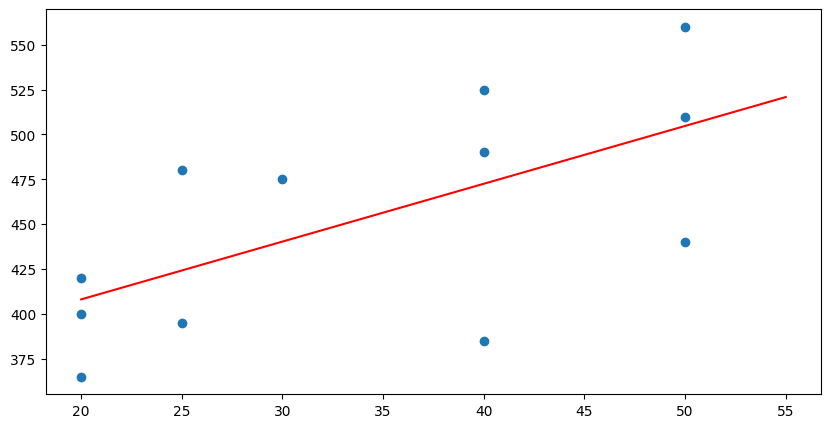

In [12]:
# Plot the scatter diagram with a regression line

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(x=df_7["advertising_costs"], y=df_7["sales"])

x_tmp = np.linspace(start=20, stop=55, num=60)

y_hats = [a + (b * x) for x in x_tmp]

ax.plot(x_tmp, y_hats, color="red")

In [13]:
# Calculate the point estimate and print result.

y_hat = a + (b * 35)

print(f"y_hat =\t${y_hat:.2f}")

y_hat =	$456.43


### Exercise 10

The file **ex10.csv** contains the selling prices $z$ of a certain make and model of used car $w$ years old.

Fit a curve of the form $\mu_{z \vert w} = \gamma \delta^{w}$ by means of the nonlinear sample regression equation $\hat{z} = cd^w$.

### Exercise 10 Solution

In [14]:
# Import the data
df_10 = pd.read_csv("ex10.csv")
df_10

,years,dollars
0,1,6350
1,2,5695
2,2,5750
3,3,5395
4,5,4985
5,5,4895


We see that if $\hat{z} = c d^w$ then simple linear regression can produce estimates $\ln(c)$, and $\ln(d)$ satisfying

$$ \ln(\hat{z}) = \ln(c) + w \ln(d) $$

which would imply the fitted regression equation

$$ \hat{z} = c d^w $$

In [15]:
# Get the estimates on log-transformed dollars and coefficients.

ln_c, ln_d = calc_ols_coef(x=df_10["years"], y=np.log(df_10["dollars"]))

In [16]:
# Get the estimates for the nonlinear regression equation
# and print the equation.

c, d = np.exp(ln_c), np.exp(ln_d)

print(f"z_hat = {c:.2f} * ({d:.2f})^w")

z_hat = 6511.38 * (0.94)^w


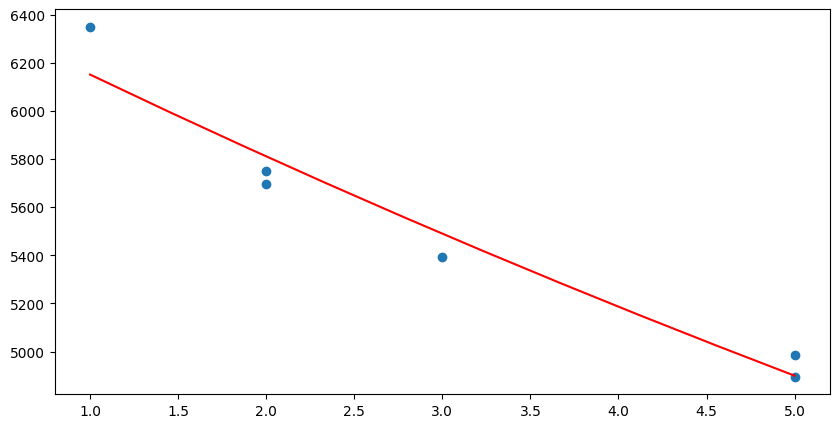

In [19]:
# Show the scatter plot and regression curve

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(x=df_10["years"], y=df_10["dollars"])

w_tmp = np.linspace(start=1, stop=5, num=10)

z_hats = [c * d**w for w in w_tmp]

ax.plot(w_tmp, z_hats, color="red")